In [1]:
import numpy as np
from imutils import contours
import cv2
import pytesseract
from matplotlib import pyplot as plt
from skimage.transform import resize

Using Humming distance

In [2]:
def hamming_distance(str1, str2):
    if len(str1) != len(str2):
        l = abs(len(str1) - len(str2))
        if len(str1) > len(str2):
            str2 = str2 + (" "*l)
        else:
            str1 = str1 + (" "*l)
        #raise ValueError("Both strings must have equal length")
    return sum(el1 != el2 for el1, el2 in zip(str1, str2))

Using Levenshtein distance

The Levenshtein distance is a measure of the difference between two strings, and can be calculated using a dynamic programming approach.

In [3]:
def levenshtein_distance(s1, s2):
    m = len(s1)
    n = len(s2)
    dp = [[0 for j in range(n + 1)] for i in range(m + 1)]
    for i in range(1, m + 1):
        dp[i][0] = i
    for j in range(1, n + 1):
        dp[0][j] = j
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if s1[i - 1] == s2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                dp[i][j] = min(dp[i - 1][j - 1] + 1, dp[i][j - 1] + 1, dp[i - 1][j] + 1)
    return dp[m][n]

This code defines a function levenshtein_distance(s1, s2) that takes two strings as input and returns the Levenshtein distance between them. The function uses a two-dimensional dp array to store intermediate results of the distance calculation, and fills in the array using a dynamic programming approach. The final result is stored in dp[m][n], where m and n are the lengths of the two strings. The example usage at the end of the code calculates the Levenshtein distance between the strings "hello" and "hollo".

Using Jaccard similarity

The Jaccard similarity is a measure of the similarity between two sets, and can be calculated as the size of the intersection divided by the size of the union of the two sets.

In [4]:
def jaccard_similarity(s1, s2):
    s1 = set(s1.split())
    s2 = set(s2.split())
    return len(s1.intersection(s2)) / len(s1.union(s2))
#Example:
s1 = "Hey hello how r u"
s2 = "Hello Hey how r u"
similarity = jaccard_similarity(s1, s2)
print("Jaccard similarity between '" + s1 + "' and '" + s2 + "':", similarity)

Jaccard similarity between 'Hey hello how r u' and 'Hello Hey how r u': 0.6666666666666666




An implementation of Fuzzy extractor with score



In [5]:
import hashlib

def fuzzy_extractor_similarity(s1, s2, k=16):
    hash1 = hashlib.sha256(s1.encode()).hexdigest()[:k]
    hash2 = hashlib.sha256(s2.encode()).hexdigest()[:k]
    distance = sum([1 for (h1, h2) in zip(hash1, hash2) if h1 != h2])
    return 100 * (1 - (distance / k))

# Example usage:
s1 = "Hey hello how r u"
s2 = "Hello Hey how r u"
similarity = fuzzy_extractor_similarity(s1, s2)
print("Similarity between '" + s1 + "' and '" + s2 + "':", similarity)

Similarity between 'Hey hello how r u' and 'Hello Hey how r u': 0.0


Custom word Distance

In [6]:
def custom_word_distance(source, target):
        a=[]
        b=[]
        a.append(0)
        b.append(0)

        s = source.split(" ")
        t = target.split(" ")
        if len(s)==1:
            s=[source]
        if len(t)==1:
            t=[target]
        dp = [[0 for x in range(len(t)+1)] for x in range(len(s)+1)]
        for i in range(len(s)+1):
            dp[i][0]=i
        for j in range(len(t)+1):
            dp[0][j]=j
        dp[0][0]=0
        for i in range(1,(len(s)+1)):
            for j in range(1,(len(t)+1)):
                fl=(dp[i][j-1])+1
                ft=(dp[i-1][j])+1
                if s[i-1]==t[j-1]:
                    fd=(dp[i-1][j-1])
                else:
                    fd=(dp[i-1][j-1])+1
                score=min(fl,ft,fd)
                dp[i][j]=score
        L_distance = dp[i][j]
        result=[]
        i=len(s)
        j=len(t)
        
        while True:
            if (s[i-1]==t[j-1]):
                if (dp[i][j]!=dp[i-1][j-1]):
                    if (dp[i][j]==(sp[i][j-1]+1)):
                        result.insert(0,["insert",i,(j-1)])
                        j-=1
                    elif (dp[i][j]==(dp[i-1][j]+1)):
                        result.insert(0,["delete",i,(j+1)])
                        i-=1
                elif (dp[i][j]==dp[i-1][j-1]):
                    #The string remained the same, so no change needed
                    i-=1
                    j-=1
            else:
                if (dp[i][j]==(dp[i-1][j-1]+1)):
                    result.insert(0,["replace",(i-1),(j-1)])
                    i-=1
                    j-=1
                elif (dp[i][j]==(dp[i][j-1]+1)):
                    result.insert(0,["insert",i,(j-1)])
                    j-=1
                elif (dp[i][j]==(dp[i-1][j]+1)):
                    result.insert(0,["delete",(i-1),j])
                    i-=1
                else:
                    result.append(["",i,j])
                    i-=1
                    j-=1
            if dp[i][j]==0:
                break

        L=result
        
        print("Levenshtein Distance= "+str(L_distance))
        
        for i in range(len(L)):
            if L[i][0]=='insert':
                print("insert", t[L[i][2]])
            elif L[i][0]=='delete':
                print("delete", s[L[i][1]])
            elif L[i][0]=='replace':
                print("replace", s[L[i][1]], t[L[i][2]])
        

In [7]:
def main():
    
    file_ref = open("Output_2/genuine.txt")
    ref_str = file_ref.read()
    ref_str = ref_str.split('\n')

    strings = []
    result = []
    for i in range(9):
        file = open(f'Output_2/File_{i}.txt')
        str_0 = file.read()
        str_0 = str_0.split('\n')
        strings.append(str_0)
        file.close()

    
    jd = []
    for i in range(len(ref_str)-1):
        ref_str[i] = ref_str[i].strip()
        h_distance = {}
        j_distance = {}
        fuzzy ={}
        l_distance = {}
        print(ref_str[i])
        for j,s in enumerate(strings):
            s[i] = s[i].strip()
            print(j, s[i])
            #Sample output of Hamming Distance
            h_distance[j] = hamming_distance(ref_str[i], s[i])
            #Sample output of Jaccard Distance
            j_distance[j] = jaccard_similarity(ref_str[i], s[i])
            #Sample output of Fuzzy extractor 
            fuzzy[j] = fuzzy_extractor_similarity(ref_str[i], s[i])
            #Sample output of Levenshtein Distance
            l_distance[j] = levenshtein_distance(ref_str[i], s[i])
        #print(h_distance)
        #print(h_distance)
        #print("***************Jaccard Distance*********************\n")
        jd.append(j_distance)
        print(j_distance)
        #print(fuzzy)
        #print(l_distance)
    
    print("***************Custom word Distance*********************\n")
    file1 = open("Output_2/genuine.txt")
    file2 = open("Output_2/File_6.txt")
    
    #Sample output of custom word distance
    
    ref_str = file1.read()
    str_1 = file2.read()
    ref_str = ref_str.split('\n')
    str_1 = str_1.split('\n')
    for i in range(len(ref_str)):
        print("_________")
        print(" ")
        ref_str[i].strip()
        str_1[i].strip()
        print(ref_str[i])
        print(str_1[i])
        print(" ")
        custom_word_distance(str_1[i], ref_str[i])
        print(" ")
        
    
    #Highlight the falsified regions of the image
    #Open the image corresponding we want to test
    path = 'Dataset_2/forgePS/ps300/Inter_3_PaySlip_Arial_10_2-f_1.jpg'
    image = cv2.imread(path)
    print(image.shape)
    for x in jd:
        result.append(x[6])
    result = [int(i*100) for i in result]
    print(result)
    # Save
    cv2.imwrite("result.png",image)
    if(image.shape == (6992, 4938, 3)):

        for i, n in enumerate(result):
            if n!= 100 and i == 0:
                #[285, 424, 4405, 123]
                cv2.rectangle(image, (285, 424), (285+4405, 424+123), (0, 0, 255), 20)
            elif n!= 100 and i == 1:
                #[285, 557, 4407, 790]
                cv2.rectangle(image, (285, 557), (285+4407, 557+790), (0, 0, 255), 20)
            elif n!= 100 and i == 2:
                #[286, 1353, 4406, 128]
                cv2.rectangle(image, (286, 1353), (286+4406, 1353+128), (0, 0, 255), 20)

            elif n!= 100 and i == 3:
                #[287, 1486, 4406, 860]
                cv2.rectangle(image, (287, 1486), (287+4406, 1486+860), (0, 0, 255), 20)

            elif n!= 100 and i == 4:
                #[288, 2347, 4407, 530]
                cv2.rectangle(image, (288, 2347), (288+4407, 2347+530), (0, 0, 255), 20)

            elif n!= 100 and i == 5:
                #[1682, 2391, 1851, 416]
                cv2.rectangle(image, (1682, 2391), (1682+1851, 2391+416), (0, 0, 255), 20)

            elif n!= 100 and i == 6:
                 #[290, 2887, 1393, 263]
                cv2.rectangle(image, (290, 2887), (290+1393, 2887+263), (0, 0, 255), 20)

            elif n!= 100 and i == 7:
                #[2361, 2881, 1160, 122]
                cv2.rectangle(image, (2361, 2881), (2361+1160, 2881+122), (0, 0, 255), 20)

            elif n!= 100 and i == 8:
                #[3536, 2878, 1159, 121]
                cv2.rectangle(image, (3536, 2878), (3536+1159, 2878+121), (0, 0, 255), 20)

            elif n!= 100 and i == 9:
                #[2362, 3016, 1159, 125]
                cv2.rectangle(image, (2362, 3016), (2362+1159, 3016+125), (0, 0, 255), 20)

            elif n!= 100 and i == 10:
                #[3536, 3013, 1160, 124]
                cv2.rectangle(image, (3536, 3013), (3536+1160, 3013+124), (0, 0, 255), 20)

            elif n!= 100 and i == 11:
                #[291, 3160, 1399, 2619]
                cv2.rectangle(image, (291, 3160), (291+1399, 3160+2619), (0, 0, 255), 20)

            elif n!= 100 and i == 12:
                #[1698, 3157, 655, 2616]
                cv2.rectangle(image, (1698, 3157), (1698+655, 3157+2616), (0, 0, 255), 20)

            elif n!= 100 and i == 13:
                #[2362, 3153, 1166, 2617]
                cv2.rectangle(image, (2362, 3153), (2362+1166, 3153+2617), (0, 0, 255), 20)

            elif n!= 100 and i == 14:
                #[3537, 3151, 1166, 2614]
                cv2.rectangle(image, (3537, 3151), (3537+1166, 3151+2614), (0, 0, 255), 20)

            elif n!= 100 and i == 15:
                #[298, 5790, 1393, 128]
                cv2.rectangle(image, (298, 5790), (298+1393, 5790+128), (0, 0, 255), 20)

            elif n!= 100 and i == 16:
                #[2369, 5782, 1160, 127]
                cv2.rectangle(image, (2369, 5782), (2369+1160, 5782+127), (0, 0, 255), 20)

            elif n!= 100 and i == 17:
                #[3544, 5779, 1159, 126]
                cv2.rectangle(image, (3544, 5779), (3544+1159, 5779+126), (0, 0, 255), 20)

            elif n!= 100 and i == 18:
                #[299, 5917, 4405, 393]
                cv2.rectangle(image, (299, 5917), (299+4405, 5917+393), (0, 0, 255), 20)

            elif n!= 100 and i == 19:
                #[2370, 5971, 2334, 142]
                cv2.rectangle(image, (2370, 5971), (2370+2334, 5971+142), (0, 0, 255), 20)

            elif n!= 100 and i == 20:
                #[2370, 6121, 2334, 144]
                cv2.rectangle(image, (2370, 6121), (2370+2334, 6121+144), (0, 0, 255), 20)

            else:
                pass
    else:

        for i, n in enumerate(result):
            if n!= 100 and i == 0:
                #[142, 212, 2203, 61]
                cv2.rectangle(image, (142, 212), (142+2203, 212+61), (0, 0, 255), 10)
            elif n!= 100 and i == 1:
                #[142, 278, 2204, 395]
                cv2.rectangle(image, (142, 278), (142+2204, 278+395), (0, 0, 255), 10)
            elif n!= 100 and i == 2:
                #[143, 677, 2203, 63]
                cv2.rectangle(image, (143, 677), (143+2203, 677+63), (0, 0, 255), 10)

            elif n!= 100 and i == 3:
                # [143, 743, 2204, 430]
                cv2.rectangle(image, (143, 743), (143+2204, 743+430), (0, 0, 255), 10)

            elif n!= 100 and i == 4:
                #[144, 1174, 2203, 264]
                cv2.rectangle(image, (144, 1174), (144+2203, 1174+264), (0, 0, 255), 10)

            elif n!= 100 and i == 5:
                #[840, 1195, 927, 209]
                cv2.rectangle(image, (840, 1195), (840+927, 1195+209), (0, 0, 255), 10)

            elif n!= 100 and i == 6:
                 #[145, 1444, 696, 131]
                cv2.rectangle(image, (145, 1444), (145+696, 1444+131), (0, 0, 255), 10)

            elif n!= 100 and i == 7:
                #[1181, 1440, 579, 61]
                cv2.rectangle(image, (1181, 1440), (1181+579, 1440+61), (0, 0, 255), 10)

            elif n!= 100 and i == 8:
                #[1768, 1439, 579, 61]
                cv2.rectangle(image, (1768, 1439), (1768+579, 1439+61), (0, 0, 255), 10)

            elif n!= 100 and i == 9:
                #[1181, 1508, 580, 62]
                cv2.rectangle(image, (1181, 1508), (1181+580, 1508+62), (0, 0, 255), 10)

            elif n!= 100 and i == 10:
                #[1768, 1507, 580, 61]
                cv2.rectangle(image, (1768, 1507), (1768+580, 1507+61), (0, 0, 255), 10)

            elif n!= 100 and i == 11:
                #[145, 1580, 700, 1310]
                cv2.rectangle(image, (145, 1580), (145+700, 1580+1310), (0, 0, 255), 10)

            elif n!= 100 and i == 12:
                #[849, 1579, 327, 1307]
                cv2.rectangle(image, (849, 1579), (849+327, 1579+1307), (0, 0, 255), 10)

            elif n!= 100 and i == 13:
                #[1181, 1577, 583, 1308]
                cv2.rectangle(image, (1181, 1577), (1181+583, 1577+1308), (0, 0, 255), 10)

            elif n!= 100 and i == 14:
                #[1768, 1575, 583, 1307]
                cv2.rectangle(image, (1768, 1575), (1768+583, 1575+1307), (0, 0, 255), 10)

            elif n!= 100 and i == 15:
                #[149, 2895, 696, 64]
                cv2.rectangle(image, (149, 2895), (149+696, 2895+64), (0, 0, 255), 10)

            elif n!= 100 and i == 16:
                #[1185, 2891, 579, 63]
                cv2.rectangle(image, (1185, 2891), (1185+579, 2891+63), (0, 0, 255), 10)

            elif n!= 100 and i == 17:
                #[1772, 2889, 580, 63]
                cv2.rectangle(image, (1772, 2889), (1772+580, 2889+63), (0, 0, 255), 10)

            elif n!= 100 and i == 18:
                #[149, 2959, 2203, 196]
                cv2.rectangle(image, (149, 2959), (149+2203, 2959+196), (0, 0, 255), 10)

            elif n!= 100 and i == 19:
                #[1185, 2986, 1167, 70]
                cv2.rectangle(image, (1185, 2986), (1185+1167, 2986+70), (0, 0, 255), 10)

            elif n!= 100 and i == 20:
                #[1185, 3061, 1167, 71]
                cv2.rectangle(image, (1185, 3061), (1185+1167, 3061+71), (0, 0, 255), 10)

            else:
                pass

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.imsave(f'/Users/bsank/Desktop/result.jpg',cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

emp|oyeur
0 emp|oyeur
1 emp|oyeur
2 emp|oyeur
3 emp|oyeur
4 emp|oyeur
5 emp|oyeur
6 emp|oyeur
7 emp|oyeur
8 emp|oyeur
{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0}
nom: adresse: cpetv|||e: numeroape: numeros|ret: t|groupautomot|vesystems bdde|'|ndustr|e 37530naze||esnegron 24202 54210000300053
0 nom: adresse: cpetv|||e: numeroape: numeros|ret: t|groupautomot|vesystems bdde|'|ndustr|e 37530naze||esnegron 24202 54210000300053
1 nom: adresse: cpetv|||e: numeroape: numeros|ret: t|groupautomot|vesystems bdde|'|ndustr|e 37530naze||esnegron 24202 54210000300053
2 nom: adresse: cpetv|||e: numeroape: numeros|ret: t|groupautomot|vesystems bdde|'|ndustr|e 37530naze||esnegron 24202 54210000300053
3 nom: adresse: cpetv|||e: numeroape: numeros|ret: t|groupautomot|vesystems bdde|'|ndustr|e 37530naze||esnegron 24202 54210000300053
4 nom: adresse: cpetv|||e: numeroape: numeros|ret: t|groupautomot|vesystems rtede|'|ndustr|e 37530naze||esnegron 24202 54210000300053
5 nom: adres

2 99450€ 99450€ 99450€ 102526€ 102526€ 102526€ 102526€ 102526€ 102526€ 102526€ 102526€ 102526€ 000€
3 99450€ 99450€ 99450€ 102526€ 102526€ 102526€ 102526€ 102526€ 102526€ 102526€ 102526€ 102526€ 000€
4 102526€ 102526€ 102526€ 000€
5 99450€ 99450€ 99450€ 102526€ 102526€ 102526€ 102526€ 102526€ 102526€ 102526€ 102526€ 102526€ 000€
6 99450€ 99450€ 99450€ 102526€ 102526€ 102526€ 102526€ 102526€ 102526€ 102526€ 102526€ 102526€ 000€
7 99450€ 99450€ 99450€ 102526€ 102526€ 102526€ 102526€ 102526€ 102526€ 102526€ 102526€ 102526€ 000€
8 99450€ 99450€ 99450€ 102526€ 102526€ 102526€ 102526€ 102526€ 102526€ 102526€ 102526€ 102526€ 000€
{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 0.6666666666666666, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0}
240% 050% 510% 075% 010% 655% 240% 240% 2387€ 497€ 5072€ 769€ 103€ 6715€ 2461€ 000€
0 240% 050% 510% 075% 010% 655% 240% 240% 2387€ aq7e 5072€ 769€ 103€ 6715€ 2461€ 000€
1 240% 050% 510% 075% 010% 655% 240% 240% 2387€ 497€ 5072€ 769€ 103€ 6715€ 2461€ 000€
2 240% 050% 510% 075% 010

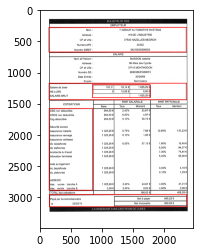

In [8]:
if __name__ == "__main__":
    main()